In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from joblib import dump

In [60]:
path = os.chdir("D:/OneDrive/Nexus/New Beginning/Internships/CodSoft/Task 4/DataSet/")
data = pd.read_csv("spam.csv", encoding = "latin-1")

In [61]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
data.columns = ["Is_Spam", "Message", "Message Vector", "#Characters", "#Words"]

In [63]:
nullVal = data.isna().sum()
print(f"Missing values found: {nullVal.sum()} \n{nullVal}")

Missing values found: 16648 
Is_Spam              0
Message              0
Message Vector    5522
#Characters       5560
#Words            5566
dtype: int64


In [64]:
print(f"Duplicates found: {data.duplicated().sum()}")
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()
    print("Duplicates Dropped!")

Duplicates found: 403
Duplicates Dropped!


In [65]:
data["Message"] = data["Message"].str.lower()
data.head()

,Is_Spam,Message,Message Vector,#Characters,#Words
0,ham,"go until jurong point, crazy.. available only ...",NaN,NaN,NaN
1,ham,ok lar... joking wif u oni...,NaN,NaN,NaN
2,spam,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,ham,u dun say so early hor... u c already then say...,NaN,NaN,NaN
4,ham,"nah i don't think he goes to usf, he lives aro...",NaN,NaN,NaN


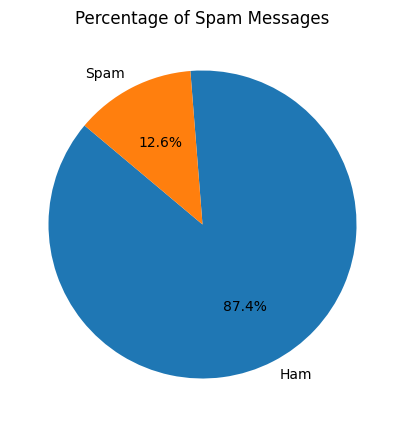

In [66]:
val = data["Is_Spam"].value_counts()
label = ["Ham", "Spam"]
plt.figure(figsize=[10,5])
plt.pie(val,labels=label, startangle=140, autopct="%1.1f%%")
plt.title("Percentage of Spam Messages")
plt.show()

In [67]:
data['Is_Spam'] = data["Is_Spam"].map({"ham": 0, "spam": 1})
data.head()

,Is_Spam,Message,Message Vector,#Characters,#Words
0,0,"go until jurong point, crazy.. available only ...",NaN,NaN,NaN
1,0,ok lar... joking wif u oni...,NaN,NaN,NaN
2,1,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,0,u dun say so early hor... u c already then say...,NaN,NaN,NaN
4,0,"nah i don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [68]:
data["#Characters"] = data['Message'].apply(len)
data.head()

,Is_Spam,Message,Message Vector,#Characters,#Words
0,0,"go until jurong point, crazy.. available only ...",NaN,111,NaN
1,0,ok lar... joking wif u oni...,NaN,29,NaN
2,1,free entry in 2 a wkly comp to win fa cup fina...,NaN,155,NaN
3,0,u dun say so early hor... u c already then say...,NaN,49,NaN
4,0,"nah i don't think he goes to usf, he lives aro...",NaN,61,NaN


In [69]:
data["Message Vector"] = data["Message"].str.split()
data.head()

,Is_Spam,Message,Message Vector,#Characters,#Words
0,0,"go until jurong point, crazy.. available only ...","[go, until, jurong, point,, crazy.., available...",111,NaN
1,0,ok lar... joking wif u oni...,"[ok, lar..., joking, wif, u, oni...]",29,NaN
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155,NaN
3,0,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor..., u, c, already...",49,NaN
4,0,"nah i don't think he goes to usf, he lives aro...","[nah, i, don't, think, he, goes, to, usf,, he,...",61,NaN


In [70]:
data["#Words"] = data["Message Vector"].apply(len)
data.head()

,Is_Spam,Message,Message Vector,#Characters,#Words
0,0,"go until jurong point, crazy.. available only ...","[go, until, jurong, point,, crazy.., available...",111,20
1,0,ok lar... joking wif u oni...,"[ok, lar..., joking, wif, u, oni...]",29,6
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155,28
3,0,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor..., u, c, already...",49,11
4,0,"nah i don't think he goes to usf, he lives aro...","[nah, i, don't, think, he, goes, to, usf,, he,...",61,13


In [71]:
data[data["Is_Spam"] == 1].describe()

,Is_Spam,#Characters,#Words
count,653.0,653.000000,653.000000
mean,1.0,137.891271,23.681470
std,0.0,30.137753,5.967672
min,1.0,13.000000,2.000000
25%,1.0,132.000000,22.000000
50%,1.0,149.000000,25.000000
75%,1.0,157.000000,28.000000
max,1.0,224.000000,35.000000


In [72]:
data[data["Is_Spam"] == 0].describe()

,Is_Spam,#Characters,#Words
count,4516.0,4516.000000,4516.000000
mean,0.0,70.459256,14.134632
std,0.0,56.358207,11.116240
min,0.0,2.000000,1.000000
25%,0.0,34.000000,7.000000
50%,0.0,52.000000,11.000000
75%,0.0,90.000000,18.000000
max,0.0,910.000000,171.000000


In [73]:
x = TfidfVectorizer().fit_transform(data["Message"]).toarray()
y = data["Is_Spam"]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [75]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=1106),
    "Random Forest": RandomForestClassifier(random_state=1106),
    "Gradient Boost": GradientBoostingClassifier(random_state=1106),
    "Gaussian NB": GaussianNB(),
    "Multinomial NB": MultinomialNB(),
    "Bernoulli NB": BernoulliNB(),
    "SVM": SVC(random_state=1106)
}

In [ ]:
for model,item in models.items():
    print(f"---------------{model}----------------------")
    fit = item.fit(x_train, y_train)
    y_pred = item.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_pred, y_test):0.0%}")
    conf_mat = confusion_matrix(y_test, y_pred)
    print(pd.DataFrame(conf_mat))
    print(classification_report(y_pred, y_test))
    

---------------Decision Tree----------------------
Accuracy: 96%
     0    1
0  892   12
1   25  105
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       917
           1       0.81      0.90      0.85       117

    accuracy                           0.96      1034
   macro avg       0.90      0.94      0.91      1034
weighted avg       0.97      0.96      0.97      1034

---------------Random Forest----------------------
Accuracy: 97%
     0   1
0  904   0
1   33  97
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       937
           1       0.75      1.00      0.85        97

    accuracy                           0.97      1034
   macro avg       0.87      0.98      0.92      1034
weighted avg       0.98      0.97      0.97      1034

---------------Gradient Boost----------------------
Accuracy: 97%
     0   1
0  901   3
1   32  98
              precision    recall  f1-score   su

In [76]:
model = SVC().fit(x_train,y_train)

In [77]:
dump(model, "Dragon.joblib")

['Dragon.joblib']